## Artificial Neural Network


# Part 1 - Data Preprocessing

In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [23]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [25]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [26]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [27]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


# Part 2 - Now let's make the ANN!


In [30]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [31]:
# Initialising the ANN
classifier = Sequential()

In [32]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  


In [33]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  


In [34]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [35]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 282us/step - loss: 0.6155 - accuracy: 0.7080 - val_loss: 0.5152 - val_accuracy: 0.7895
Epoch 2/100
5359/5359 [==============================] - 1s 248us/step - loss: 0.4987 - accuracy: 0.7944 - val_loss: 0.4873 - val_accuracy: 0.7952
Epoch 3/100
5359/5359 [==============================] - 1s 246us/step - loss: 0.4782 - accuracy: 0.7959 - val_loss: 0.4720 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 247us/step - loss: 0.4646 - accuracy: 0.7960 - val_loss: 0.4614 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 248us/step - loss: 0.4547 - accuracy: 0.7960 - val_loss: 0.4539 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 247us/step - loss: 0.4468 - accuracy: 0.7960 - val_loss: 0.4473 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 246us/step

5359/5359 [==============================] - 1s 251us/step - loss: 0.3339 - accuracy: 0.8593 - val_loss: 0.3562 - val_accuracy: 0.8538
Epoch 57/100
5359/5359 [==============================] - 1s 254us/step - loss: 0.3334 - accuracy: 0.8600 - val_loss: 0.3561 - val_accuracy: 0.8561
Epoch 58/100
5359/5359 [==============================] - 1s 256us/step - loss: 0.3332 - accuracy: 0.8602 - val_loss: 0.3561 - val_accuracy: 0.8550
Epoch 59/100
5359/5359 [==============================] - 1s 257us/step - loss: 0.3328 - accuracy: 0.8599 - val_loss: 0.3569 - val_accuracy: 0.8557
Epoch 60/100
5359/5359 [==============================] - 1s 254us/step - loss: 0.3325 - accuracy: 0.8599 - val_loss: 0.3563 - val_accuracy: 0.8569
Epoch 61/100
5359/5359 [==============================] - 1s 250us/step - loss: 0.3320 - accuracy: 0.8591 - val_loss: 0.3561 - val_accuracy: 0.8561
Epoch 62/100
5359/5359 [==============================] - 1s 251us/step - loss: 0.3319 - accuracy: 0.8615 - val_loss: 0.3560 

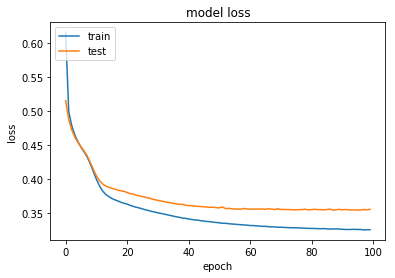

In [46]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model


In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [43]:
score

0.853